In [1]:
# importing necessary libraries

import warnings
warnings.filterwarnings("ignore")
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,auc

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
#reading the file

path="C:\\Users\\91755\\Downloads\\bank+marketing (1)\\bank-additional\\bank-additional\\bank-additional-full.csv"
df=pd.read_csv(path,sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# no.of rows and columns

df.shape

(41188, 21)

In [4]:
# dropping duplicates

df_ref=df.drop_duplicates()
print("NO_OF_DUPLICATES = ",df.shape[0] - df_ref.shape[0])
df_ref.shape

NO_OF_DUPLICATES =  12


(41176, 21)

In [5]:
#copying the dataset for furthur analysis

df=df_ref.copy()

In [6]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [7]:
# summary_statistic of numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# summary_statistic of categorical columns
df.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [9]:
# missing value analysis

df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# checking for hidden inappropriate values
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [11]:
#there is some data in education column to be replaced as per portuguese education system
df['education']=df['education'].replace({"basic.4y":"first_cycle","basic.6y":"second_cycle",
                                        "basic.9y":"third_cycle"})

In [12]:
#after replacing value, check for assuring whether values are replaced correctly 
df['education'].unique()

array(['first_cycle', 'high.school', 'second_cycle', 'third_cycle',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [13]:
# found an inappropriate value called "unknown" which might be an missing value or to be considered so,
# checking for the persence of that particular value in all categorical columns
unknown_cols=[]

value='unknown'

for i in df.select_dtypes(exclude=np.number).columns:
    if value in df[i].values:
        unknown_cols.append(i)
unknown_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [14]:
# since the above categorical columns has "unknown" value in it, counting the no.of of unknown value in all cat.columns
unknown_counts={}

value='unknown'

for i in unknown_cols:
    count=(df[i]==value).sum()
    unknown_counts[i]=count
unknown_counts

{'job': 330,
 'marital': 80,
 'education': 1730,
 'default': 8596,
 'housing': 990,
 'loan': 990}

In [15]:
# calculating the percentage of "unknown" value in all cat.columns

df_unknown=pd.DataFrame()
df_unknown["unknown_count"]=unknown_counts.values()
df_unknown.index=unknown_counts.keys()
df_unknown["unknown_percent"]=df_unknown['unknown_count']/len(df)*100
df_unknown.sort_values(by="unknown_count",ascending=False)

,unknown_count,unknown_percent
default,8596,20.876239
education,1730,4.201477
housing,990,2.404313
loan,990,2.404313
job,330,0.801438
marital,80,0.194288


In [16]:
# feature engineering the age column for ease analysis
age_bins = [0, 18, 35, 65, 100]
age_labels = ['minor', 'young adult', 'adult', 'senior']

# Create a new column 'age_category' based on age ranges
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [17]:
# dropping the "unknown" values and making dataset ready to take forward 

new_df=df[~(df=="unknown").any(axis=1)]
new_df.shape

(30478, 22)

In [18]:
# after dropping all the unknown values, ensuring this new refined dataset has no such values present in it
unknown_counts={}

value='unknown'

for i in unknown_cols:
    count=(new_df[i]==value).sum()
    unknown_counts[i]=count
unknown_counts

{'job': 0, 'marital': 0, 'education': 0, 'default': 0, 'housing': 0, 'loan': 0}

In [19]:
# two step assurance for non-presence of unknown value
unique_df=pd.DataFrame(index=unknown_cols)
bef_rem_nuniq=[]
aft_rem_nuniq=[]
for i in unknown_cols:
    bef_rem=df[i].nunique()
    after_rem=new_df[i].nunique()
    bef_rem_nuniq.append(bef_rem)
    aft_rem_nuniq.append(after_rem)
unique_df['before_removal']=bef_rem_nuniq
unique_df['after_removal']=aft_rem_nuniq

unique_df.sort_values(by='before_removal',ascending=False)

,before_removal,after_removal
job,12,11
education,8,7
marital,4,3
default,3,2
housing,3,2
loan,3,2


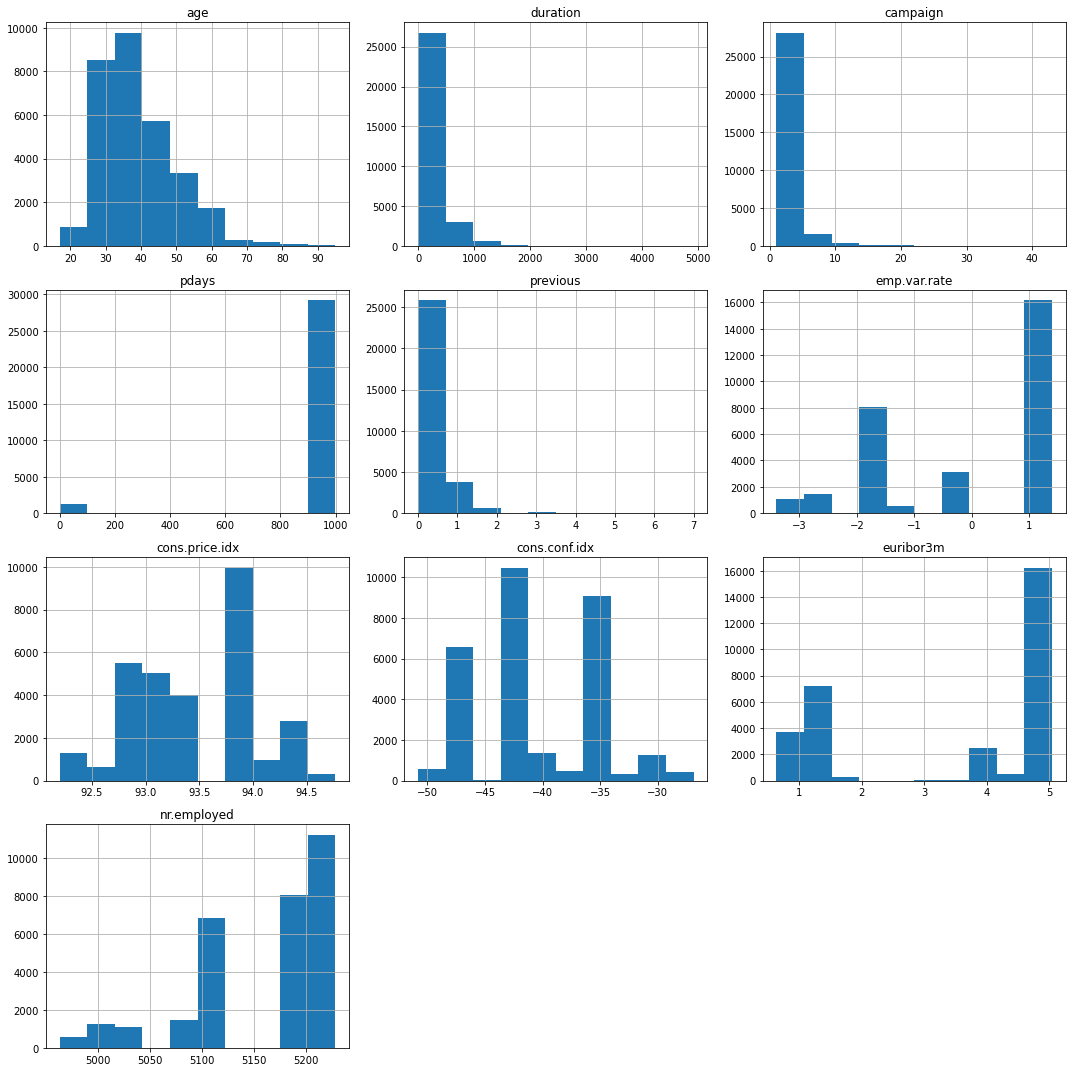

In [20]:
# frequency distribution of numerical columns

new_df.hist(figsize=(15,15))
plt.title("FREQUENCY_DISTRIBUTION_NUMERICAL_COLUMNS")
plt.tight_layout()
plt.show()

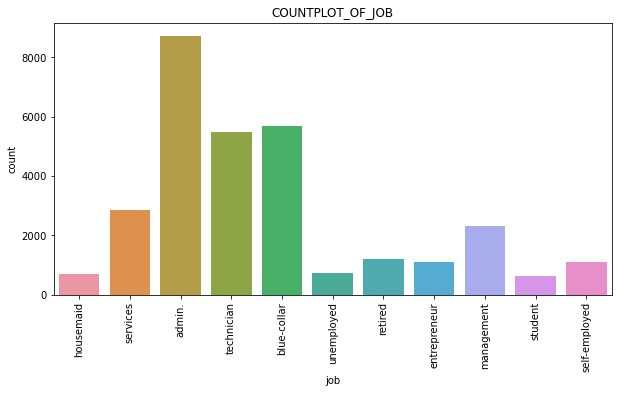

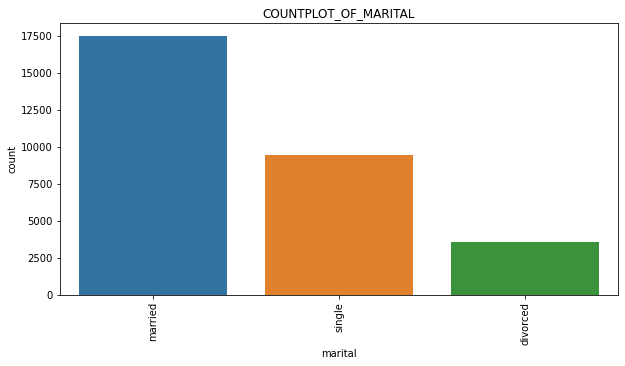

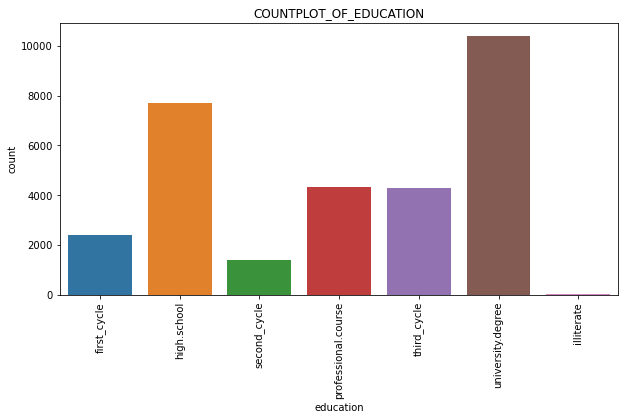

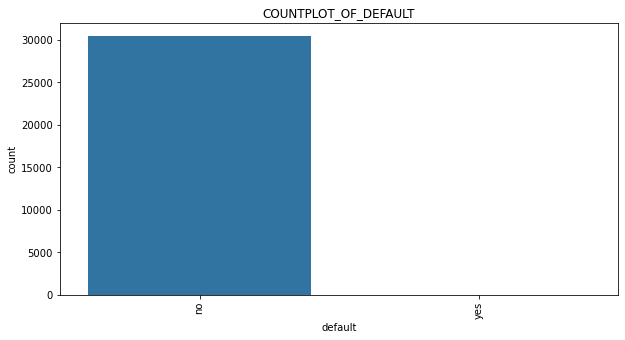

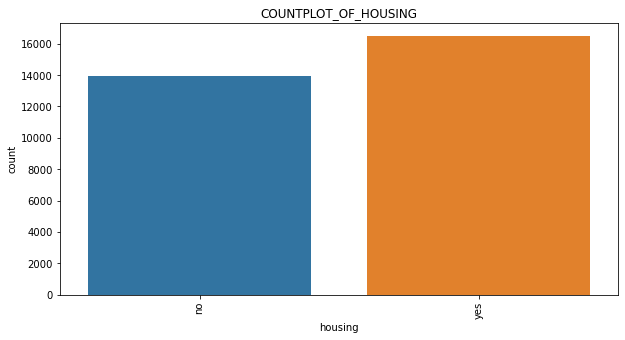

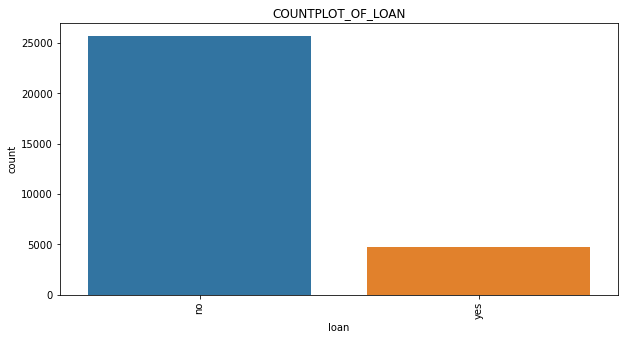

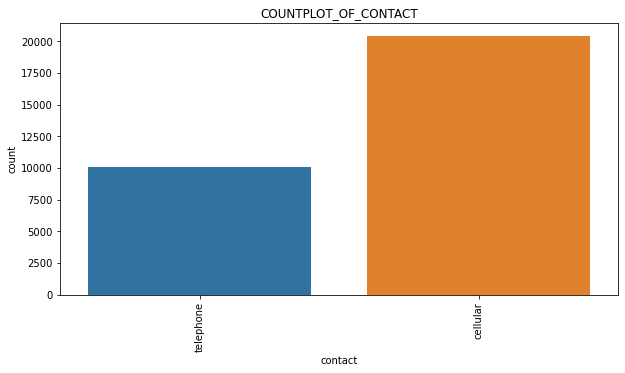

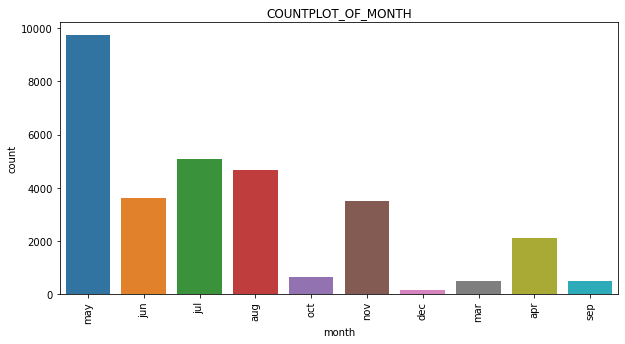

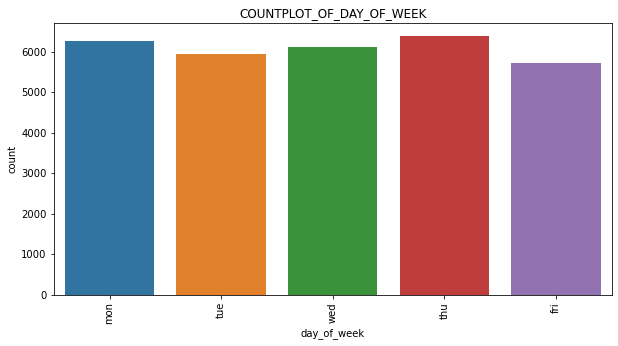

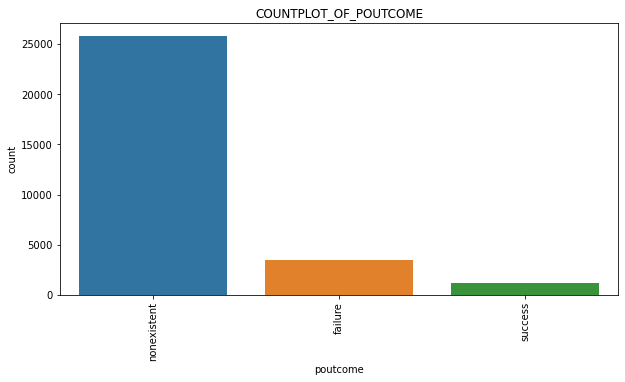

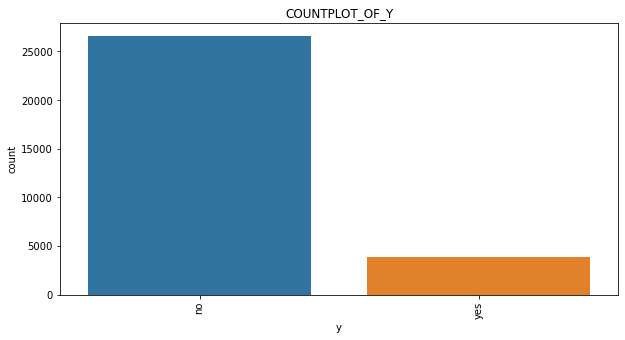

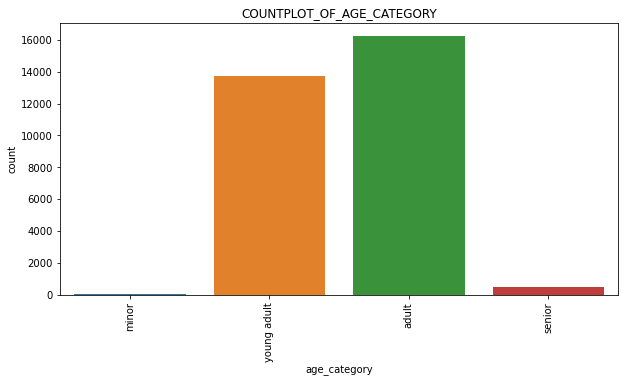

In [21]:
for i in new_df.select_dtypes(exclude=np.number):
    plt.figure(figsize=(10,5))
    sns.countplot(x=new_df[i])
    plt.title(f"COUNTPLOT_OF_{i.upper()}")
    plt.xticks(rotation=90)
    plt.show()

In [22]:
# target variable
new_df['y'].value_counts()

no     26620
yes     3858
Name: y, dtype: int64

In [23]:
# converting target variable to binary number class
new_df['y'].replace({"no":0,"yes":1},inplace=True)
new_df['y'].dtype

dtype('int64')

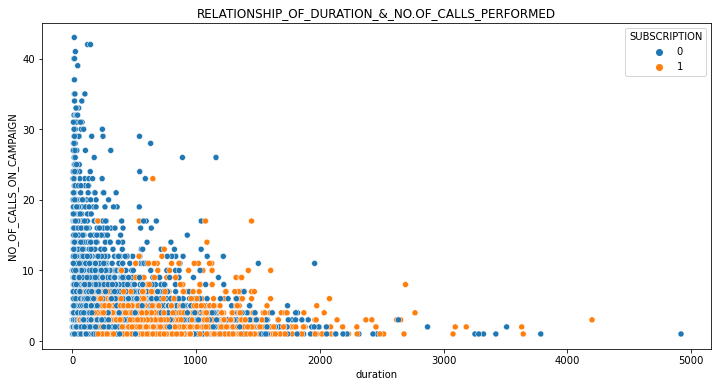

In [24]:
# checking the relationship between no.of calls, duration and subscription
plt.figure(figsize=(12,6))
sns.scatterplot(x=new_df['duration'],y=new_df['campaign'],hue=new_df['y'])
plt.title("RELATIONSHIP_OF_DURATION_&_NO.OF_CALLS_PERFORMED")
plt.ylabel("NO_OF_CALLS_ON_CAMPAIGN")
plt.legend(title='SUBSCRIPTION')
plt.show()

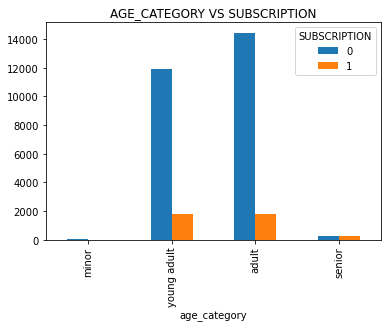

In [25]:
# barchart to represent, age_category wise  data

pd.pivot_table(data=new_df,index=new_df['age_category'],columns=new_df['y'],aggfunc='size').plot(kind='bar')
plt.title("AGE_CATEGORY VS SUBSCRIPTION")
plt.legend(title='SUBSCRIPTION')
plt.show()

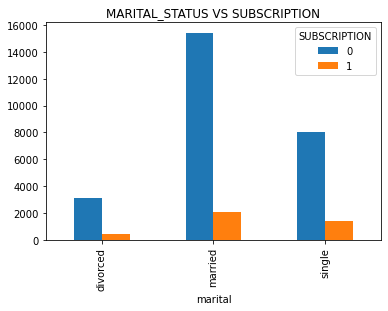

In [26]:
# barchart to represent, marital_status wise subscription data
pd.pivot_table(data=new_df,index=new_df['marital'],columns=new_df['y'],aggfunc='size').plot(kind='bar')
plt.title("MARITAL_STATUS VS SUBSCRIPTION")
plt.legend(title='SUBSCRIPTION')
plt.show()

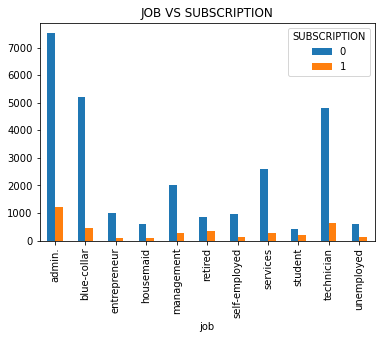

In [27]:
#barchart to represent, job wise subscription data
pd.pivot_table(data=new_df,index=new_df['job'],columns=new_df['y'],aggfunc='size').plot(kind='bar')
plt.title("JOB VS SUBSCRIPTION")
plt.legend(title='SUBSCRIPTION')
plt.show()

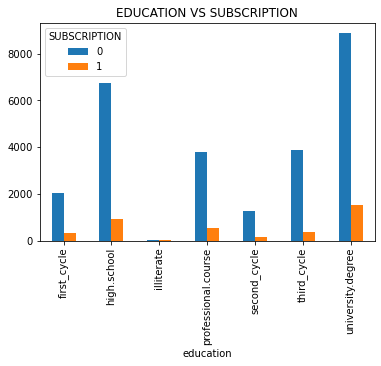

In [28]:
# barchart to represent , education wise subscription data
pd.pivot_table(data=new_df,index=new_df['education'],columns=new_df['y'],aggfunc='size').plot(kind='bar')
plt.title("EDUCATION VS SUBSCRIPTION")
plt.legend(title='SUBSCRIPTION')
plt.show()

In [29]:
for i in new_df.select_dtypes(exclude=np.number):
    print(i)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
age_category


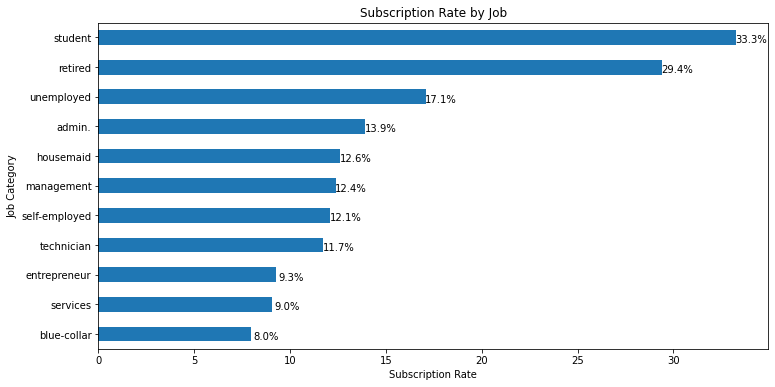

In [30]:
plt.rcParams['figure.figsize']=[10,5]
count_job_response_pct = pd.crosstab(new_df['y'],new_df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct[1].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

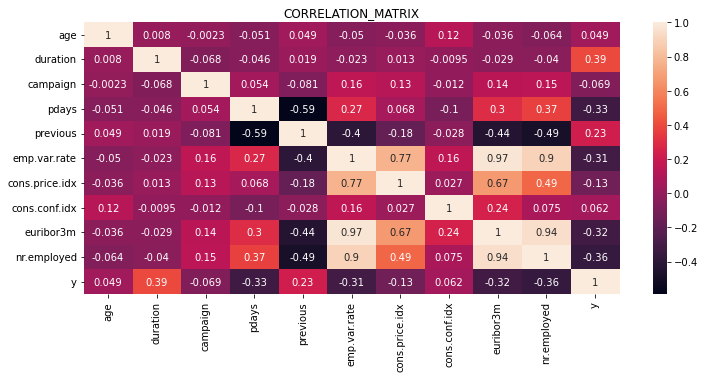

In [31]:
# correlation matrix

plt.figure(figsize=(12,5))
sns.heatmap(new_df.corr(),annot=True)
plt.title("CORRELATION_MATRIX")
plt.show()

In [32]:
# splitting master_df to numerical and categorical datsets to perform encoding and scaling
df_num=new_df.select_dtypes(include=np.number)
df_cat=new_df.select_dtypes(exclude=np.number)
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age_category'],
      dtype='object')

In [33]:
# finding no_of_unique_values in a column to check the hierarchy and to choose suitable encoding technique
nunique_df=pd.DataFrame(index=df_cat.columns)
nunique=[]
for i in df_cat.columns:
    unique_count=df_cat[i].nunique()
    nunique.append(unique_count)
nunique_df['nunique']=nunique
nunique_df.sort_values(by='nunique',ascending=False)

,nunique
job,11
month,10
education,7
day_of_week,5
age_category,4
marital,3
poutcome,3
default,2
housing,2
loan,2


In [34]:
# selecting columns with unique values greater than 2
encod=nunique_df[nunique_df['nunique']>2]
encod.sort_values(by='nunique',ascending=False)

,nunique
job,11
month,10
education,7
day_of_week,5
age_category,4
marital,3
poutcome,3


In [35]:
# for columns with no_hierarchy and class greater than 2 choosing label_encoder technique
encod=nunique_df[nunique_df['nunique']>2]
encod.sort_values(by='nunique',ascending=False)

,nunique
job,11
month,10
education,7
day_of_week,5
age_category,4
marital,3
poutcome,3


In [36]:
dummy=pd.get_dummies(df_cat[encod.index],drop_first=True)
dummy.sample(5)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_high.school,education_illiterate,education_professional.course,education_second_cycle,education_third_cycle,education_university.degree,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age_category_young adult,age_category_adult,age_category_senior
41017,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
34361,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
7466,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
26465,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1891,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [37]:
rest_cat=[]
for i in df_cat.columns:
    if i not in encod.index:
        rest_cat.append(i)
rest_cat

['default', 'housing', 'loan', 'contact']

In [38]:
for i in rest_cat:
    df_cat[i].replace({"no":0,"yes":1},inplace=True)
    df_cat[i].replace({"cellular":0,"telephone":1},inplace=True)

In [39]:
df_cat=pd.concat([dummy,df_cat[rest_cat]],axis=1)

In [40]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   job_blue-collar                30478 non-null  uint8
 1   job_entrepreneur               30478 non-null  uint8
 2   job_housemaid                  30478 non-null  uint8
 3   job_management                 30478 non-null  uint8
 4   job_retired                    30478 non-null  uint8
 5   job_self-employed              30478 non-null  uint8
 6   job_services                   30478 non-null  uint8
 7   job_student                    30478 non-null  uint8
 8   job_technician                 30478 non-null  uint8
 9   job_unemployed                 30478 non-null  uint8
 10  marital_married                30478 non-null  uint8
 11  marital_single                 30478 non-null  uint8
 12  education_high.school          30478 non-null  uint8
 13  education_illite

In [41]:
# concatenating numerical columns with categorical columns
df_encod=pd.concat([df_num,df_cat],axis=1)
df_encod.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_high.school,education_illiterate,education_professional.course,education_second_cycle,education_third_cycle,education_university.degree,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age_category_young adult,age_category_adult,age_category_senior,default,housing,loan,contact
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [42]:
df_encod.shape

(30478, 51)

In [43]:
# splitting encoded df into independent and dependent variables
X=df_encod.drop(['age','y'],axis=1)
y=df_encod['y']

In [44]:
y.value_counts()

0    26620
1     3858
Name: y, dtype: int64

In [45]:
# since, target variable has class imbalance, SMOTE technique is used to replicate the minority class  
sampling_strategy = 1.0  
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [46]:
# splitting independent and dependent variables, into train and test
xtrain,xtest,ytrain,ytest=train_test_split(X_res,y_res,test_size=0.3,random_state=100)
print("xtrain = ",xtrain.shape)
print("xtest = ",xtest.shape)
print("ytrain = ",ytrain.shape)
print("ytest = ",ytest.shape)

xtrain =  (37268, 49)
xtest =  (15972, 49)
ytrain =  (37268,)
ytest =  (15972,)


In [47]:
df_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [48]:
# splitting xtrain numerical columns and performing scaling on numerical columns alone 
xtrain_num=xtrain[df_num.columns[1:-1]]
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain_num)
xtrain_sc=pd.DataFrame(sc_xtrain,columns=xtrain_num.columns,index=xtrain_num.index)
xtrain_sc.describe()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3.726800e+04,3.726800e+04,3.726800e+04,3.726800e+04,3.726800e+04,3.726800e+04,3.726800e+04,3.726800e+04,3.726800e+04
mean,-1.328943e-17,1.020140e-15,-1.795920e-15,-1.275321e-17,-8.018373e-16,-9.643914e-15,1.057278e-15,8.379401e-17,1.307315e-15
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.079350e+00,-5.173504e-01,-2.747340e+00,-4.366398e-01,-1.613233e+00,-1.972217e+00,-1.950122e+00,-1.162142e+00,-1.901086e+00
25%,-6.645902e-01,-5.173504e-01,3.662558e-01,-4.366398e-01,-6.787986e-01,-8.682384e-01,-8.661503e-01,-9.512017e-01,-6.100366e-01
50%,-3.339422e-01,-5.173504e-01,3.662558e-01,-4.366398e-01,-2.699835e-01,1.079618e-02,-2.908114e-01,-7.414069e-01,-3.474697e-01
75%,3.418560e-01,-6.431779e-02,3.662558e-01,-4.366398e-01,1.190070e+00,8.882354e-01,7.047751e-01,1.139122e+00,1.131619e+00
max,1.318492e+01,1.851002e+01,3.662558e-01,9.437566e+00,1.190070e+00,2.121436e+00,2.456270e+00,1.187054e+00,1.131619e+00


In [49]:
# transforming xtest 
xtest_num=xtest[df_num.columns[1:-1]]
sc_xtest=sc.transform(xtest_num)
xtest_sc=pd.DataFrame(sc_xtest,columns=xtest_num.columns,index=xtest_num.index)
xtest_sc.describe()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,0.016199,0.009911,0.006067,-0.011099,0.017214,0.015694,-0.012617,0.015690,0.016226
std,1.034030,1.052745,0.992771,0.971886,1.001464,1.007935,0.992713,1.001576,1.000137
min,-1.079350,-0.517350,-2.747340,-0.436640,-1.613233,-1.972217,-1.950122,-1.162142,-1.901086
25%,-0.661690,-0.517350,0.366256,-0.436640,-0.678799,-0.868238,-0.906427,-0.943786,-0.610037
50%,-0.328141,-0.517350,0.366256,-0.436640,-0.269984,0.010796,-0.290811,-0.730223,-0.347470
75%,0.373761,-0.064318,0.366256,-0.436640,1.190070,0.888235,0.704775,1.140187,1.131619
max,11.087917,18.056986,0.366256,11.083267,1.190070,2.121436,2.456270,1.187054,1.131619


In [50]:
xtrain_cat=xtrain[df_cat.columns]
xtrain_cat.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_high.school,education_illiterate,education_professional.course,education_second_cycle,education_third_cycle,education_university.degree,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age_category_young adult,age_category_adult,age_category_senior,default,housing,loan,contact
6251,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1
41477,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1516,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
6267,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1


In [51]:
xtest_cat=xtest[df_cat.columns]
xtest_cat.shape

(15972, 40)

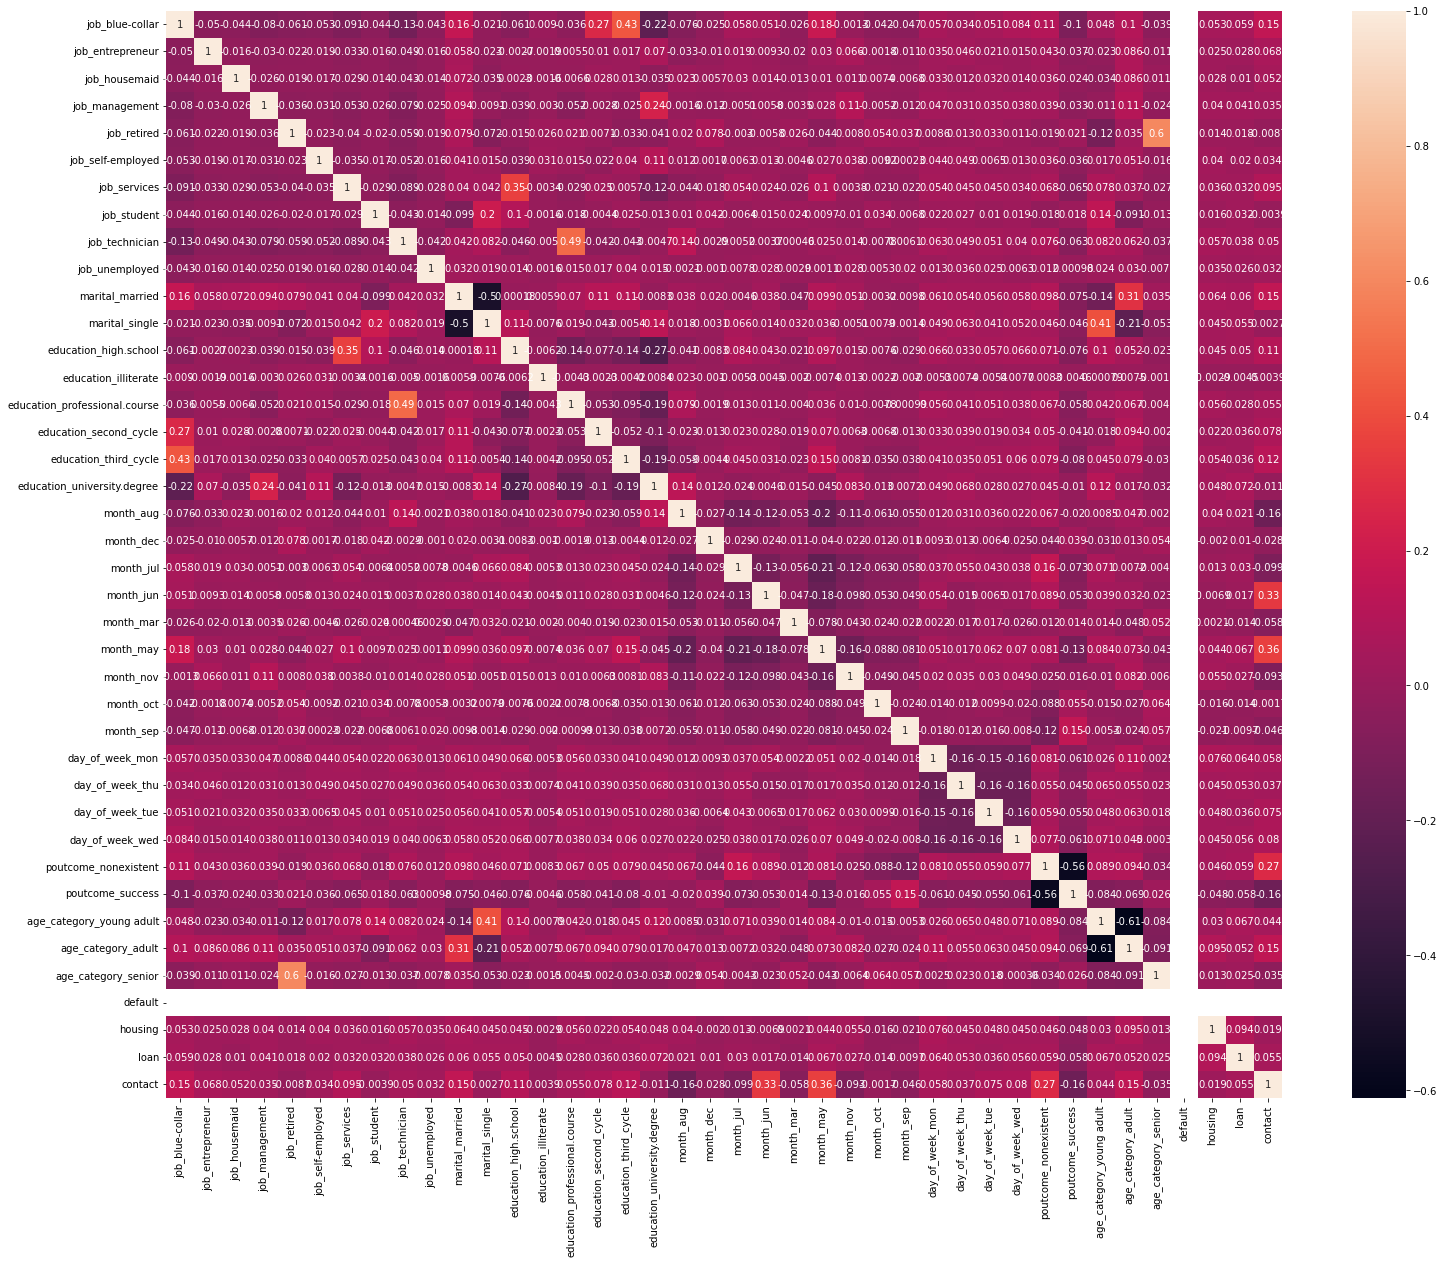

In [52]:
plt.figure(figsize=(25,20))
sns.heatmap(xtest_cat.corr(),annot=True)
plt.show()

In [53]:
xtrain_df=pd.concat([xtrain_sc,xtrain_cat],axis=1)
xtest_df=pd.concat([xtest_sc,xtest_cat],axis=1)
print(xtrain_df.shape)
print(xtest_df.shape)

(37268, 49)
(15972, 49)


In [54]:
# using regularization, performing feature selection

lasso_classi=LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lasso_classi.fit(xtrain_df,ytrain)
lasso_pred=lasso_classi.predict(xtest_df)
lasso_pred[0:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [55]:
print(classification_report(ytest,lasso_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7972
           1       0.94      0.92      0.93      8000

    accuracy                           0.93     15972
   macro avg       0.93      0.93      0.93     15972
weighted avg       0.93      0.93      0.93     15972



In [56]:
# getting the features out

coefficients=lasso_classi.coef_[0]
feature_coef = list(zip(xtrain_df.columns, coefficients))
important_features = [feature for feature, coef in feature_coef if coef != 0]
imp_fea=[]
for feature in important_features:
    imp_fea.append(feature)
len(imp_fea)

46

In [57]:
selected_features=[]
for i in xtrain_df.columns:
    if i in imp_fea:
        selected_features.append(i)
selected_features

['duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'nr.employed',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_high.school',
 'education_professional.course',
 'education_second_cycle',
 'education_third_cycle',
 'education_university.degree',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success',
 'age_category_young adult',
 'age_category_adult',
 'age_category_senior',
 'housing',
 'loan',
 'contact']

In [58]:
#features that are not important
unselected_features=[]
for i in xtrain_df.columns:
    if i not in imp_fea:
        unselected_features.append(i)
unselected_features

['cons.conf.idx', 'education_illiterate', 'default']

In [59]:
xtrain_sel=xtrain_df[selected_features]
xtest_sel=xtest_df[selected_features]

In [60]:
# Logistic Regression algorithm
lr_model=LogisticRegression()
lr_model.fit(xtrain_sel,ytrain)
y_pred=lr_model.predict(xtest_sel)
y_pred[0:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [61]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8208
           1       0.92      0.94      0.93      7764

    accuracy                           0.93     15972
   macro avg       0.93      0.93      0.93     15972
weighted avg       0.93      0.93      0.93     15972



In [62]:
# Grid Search for logistic regression

start=time.time()
# hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
}
logistic_regression = LogisticRegression(random_state=42)
# initiation of grid search
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain_sel, ytrain)
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(xtest_sel, ytest)
print("Test Accuracy:", test_accuracy)

end=time.time()
run_time=end-start
print("RUNTIME : ",run_time,"SEC")

Best Hyperparameters:
{'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9315231294180135
Test Accuracy: 0.9301277235161532
RUNTIME :  257.625962972641 SEC


In [63]:
# Decision tree algorithm
tree=DecisionTreeClassifier()
tree.fit(xtrain_sel,ytrain)
tree_pred=tree.predict(xtest_sel)
tree_pred[0:10]

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [64]:
print(classification_report(tree_pred,ytest))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      7895
           1       0.93      0.92      0.92      8077

    accuracy                           0.92     15972
   macro avg       0.92      0.92      0.92     15972
weighted avg       0.92      0.92      0.92     15972



In [65]:
# grid search for decision tree
start=time.time()
param_grid={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[5,10,15,20],
    'min_samples_leaf':[10,20,30,40],
    'min_samples_split':[10,20,30]
}

dt_model = DecisionTreeClassifier(random_state=100)
gs_dt_model = GridSearchCV(estimator=dt_model,param_grid=param_grid,scoring='accuracy',cv=5)
gs_dt_model.fit(xtrain_sel,ytrain)
print("Best Hyperparameters:")
print(gs_dt_model.best_params_)
print("Best Accuracy:", gs_dt_model.best_score_)

best_dt_model = gs_dt_model.best_estimator_

test_accuracy = best_dt_model.score(xtest_sel, ytest)
print("Test Accuracy:", test_accuracy)

end=time.time()
run_time=end-start
print("RUNTIME : ",run_time,"SEC")

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best Accuracy: 0.9196629906595419
Test Accuracy: 0.9237415477084898
RUNTIME :  312.01419949531555 SEC


In [66]:
# random forest algorithm
start=time.time()
rf=RandomForestClassifier(random_state=100)
rf.fit(xtrain_sel,ytrain)
rf_pred=rf.predict(xtest_sel)
print(classification_report(rf_pred,ytest))
end=time.time()
runtime=end-start
runtime

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7964
           1       0.94      0.94      0.94      8008

    accuracy                           0.94     15972
   macro avg       0.94      0.94      0.94     15972
weighted avg       0.94      0.94      0.94     15972



11.830996036529541

In [67]:
# grid search for random forest   
start=time.time()
param_gird={"n_estimator":[80,90],
           "criterion":['gini','entropy'],
           "max_depth":[10,15],
           "min_samples_split":[10,15],
           "min_samples_leaf":[20,30]}

rf_model =RandomForestClassifier(random_state=100)
gs_rf_model = GridSearchCV(estimator=rf_model,param_grid=param_grid,scoring='accuracy',n_jobs=-1)
gs_rf_model.fit(xtrain_sel,ytrain)
print("Best Hyperparameters:")
print(gs_rf_model.best_params_)
print("Best Accuracy:", gs_rf_model.best_score_)
best_rf_model = gs_rf_model.best_estimator_
test_accuracy = best_rf_model.score(xtest_sel, ytest)
print("Test Accuracy:", test_accuracy)

end=time.time()
run_time=end-start
print("RUNTIME : ",run_time,"SEC")

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best Accuracy: 0.936513914889807
Test Accuracy: 0.9358251940896569
RUNTIME :  4175.700350046158 SEC


In [68]:
# Naive bayes algorithm
nav_bai=GaussianNB()
nav_bai.fit(xtrain_sel,ytrain)
nb_pred=nav_bai.predict(xtest_sel)
nb_pred[0:10]
print(classification_report(nb_pred,ytest))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      8259
           1       0.86      0.89      0.88      7713

    accuracy                           0.88     15972
   macro avg       0.88      0.88      0.88     15972
weighted avg       0.88      0.88      0.88     15972



In [69]:
#grid search for naive bayes

gnb=GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gs_gnb=GridSearchCV(estimator=gnb,param_grid=param_grid,cv=5,scoring='accuracy')
gs_gnb.fit(xtrain_sel,ytrain)
print("Best Hyperparameters:")
print(gs_gnb.best_params_)
print("Best Accuracy:", gs_gnb.best_score_)
best_gn_model = gs_gnb.best_estimator_
test_accuracy = best_gn_model.score(xtest_sel, ytest)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters:
{'var_smoothing': 1e-09}
Best Accuracy: 0.8783945728983105
Test Accuracy: 0.8786000500876534


In [70]:
# stochastic gradient algorithm
sto_gra=SGDClassifier()
sto_gra.fit(xtrain_sel,ytrain)
sg_pred=sto_gra.predict(xtest_sel)
sg_pred[0:10]
print(classification_report(sg_pred,ytest))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8342
           1       0.91      0.95      0.93      7630

    accuracy                           0.93     15972
   macro avg       0.93      0.93      0.93     15972
weighted avg       0.93      0.93      0.93     15972



In [71]:
start=time.time()
sgd_classifier = SGDClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000]}
gs_sgd = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
gs_sgd.fit(xtrain_sel,ytrain)
print("Best Hyperparameters:")
print(gs_sgd.best_params_)
print("Best Accuracy:", gs_sgd.best_score_)
best_model = gs_sgd.best_estimator_
test_accuracy = best_model.score(xtest_sel, ytest) 
print("Test Accuracy:", test_accuracy)

end=time.time()
runtime=end-start
print("RUNTIME : ",runtime,"SECS")     

Best Hyperparameters:
{'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
Best Accuracy: 0.9331330249115727
Test Accuracy: 0.9294390182819935
RUNTIME :  68.38596868515015 SECS


In [72]:
svm_class=SVC(random_state=100)
svm_class.fit(xtrain_sel,ytrain)
svm_pred=svm_class.predict(xtest_sel)
svm_pred[0:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [73]:
print(classification_report(svm_pred,ytest))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8125
           1       0.93      0.95      0.94      7847

    accuracy                           0.94     15972
   macro avg       0.94      0.94      0.94     15972
weighted avg       0.94      0.94      0.94     15972



**MODEL_COMPARISON**

In [76]:
models = [grid_search,gs_dt_model,gs_rf_model,gs_gnb,svm_class]  # Add all your models here
model_names = ["LOG-REG", "DECS_TREE", "RAND_FOR","NAV_BAI",'SVM_CLASS'] 

metrics_df = pd.DataFrame(columns=["Model","Accuracy"])

for model, model_name in zip(models, model_names):
    # xtest_sel and ytest are your test data
    y_pred = model.predict(xtest_sel)
    # Calculate accuracy separately
    accuracy = accuracy_score(ytest, y_pred)
    
    metrics_df = metrics_df.append({
        "Model": model_name,
        "Accuracy": accuracy
    }, ignore_index=True)

# Setting the "Model" column as the index
metrics_df.set_index("Model", inplace=True)

metrics_df.sort_values(by="Accuracy", ascending=False)

,Accuracy
Model,
SVM_CLASS,0.936952
RAND_FOR,0.935825
LOG-REG,0.930128
DECS_TREE,0.923742
NAV_BAI,0.878600
